## Mini Jupyter Exercise #2

**Objective:** The goal of this exercise is to explore various aspects of _principal components analysis_ (PCA)
using both synthetic data and real data.

### PCA Involving Synthetic Data

In [1]:
# Problem 1

import numpy as np
from IPython.display import display, Latex

# Generation of a random 3 x 2 matrix A
A = np.random.randn(3,2)

# Display the rank of A
display(Latex(r'The rank of matrix $\mathbf A$ is: rank($\mathbf A$) = {}.'.format(np.linalg.matrix_rank(A))))

<IPython.core.display.Latex object>

We will now treat the two columns of $\mathbf{A}$ as basis for a two-dimensional subspace in $\mathbb{R}^3$ and generate a synthetic dataset in which each data sample lies in the column space of $\mathbf{A}$.

### Generation of Dataset \#1

In [2]:
# Problem 1

# Number of data samples
N = 500

# Generation of random coefficients for the dataset
V = np.random.randn(2,N)

# Generation of the dataset
X = A@V

# Print the dimensionality of X
display(Latex(r'The dimensionality of the data matrix $\mathbf X$ is ${}\times{}$.'.format(X.shape[0],X.shape[1])))

# Print the rank of X
display(Latex(r'The rank of matrix $\mathbf X$ is: rank($\mathbf X$) = {}.'.format(np.linalg.matrix_rank(X))))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Singular Value and Eigenvalue Decomposition of Dataset \#1

In [3]:
# Problem 1

# Singular value decomposition of X
U, s, Vh = np.linalg.svd(X)

# Eigenvalue decomposition of X
w, V = np.linalg.eigh(X@X.T)

# Print the left singular vectors of X and the eigenvectors of XX^T and check the equivalence
display(Latex(r'The left singular vectors of $\mathbf X$, expressed in terms of a matrix are:'))
# Print U
print(U)
display(Latex(r'The eigenvectors of $\mathbf{XX}^T$, expressed in terms of a matrix are:'))
# Print V
print(V)

<IPython.core.display.Latex object>

[[-0.68022897  0.63156692 -0.37203732]
 [-0.66677456 -0.32232209  0.6719525 ]
 [ 0.30446713  0.70514658  0.64036558]]


<IPython.core.display.Latex object>

[[ 0.37203732  0.63156692 -0.68022897]
 [-0.6719525  -0.32232209 -0.66677456]
 [-0.64036558  0.70514658  0.30446713]]


Notice that the left singular vectors of $\mathbf{X}$ and the eigenvectors of $\mathbf{XX}^T$ are the same; their listing does not appear the same on first glance since `linalg.svd` outputs the singular values in descending order, where `linalg.eigh` outputs the eigenvalues in ascending order.

In [4]:
# Print square of the singular values of X and the eigenvalues of XX^T and check the equivalence
display(Latex(r'Square of the singular values of $\mathbf X$ are: {}.'.format(s**2)))
display(Latex(r'The eigenvalues of $\mathbf{{XX}}^T$ are: {}.'.format(w)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In order to see the equivalence between the square of the singular values of $\mathbf{X}$ and the eigenvalues of $\mathbf{XX}^T$, we once again need to be aware of the descending versus ascending order for `linalg.svd` and `linalg.eigh`. The only discrepancy in this case is for the smallest singular/eigenvalue. However, that discrepancy is due to numerical issues; in reality, we should only have two nonzero singular/eigenvalues since the rank of $\mathbf{X}$ is 2. However, numerical algorithms almost never manage to return singular/eigenvalues that are exactly zero in such situations due to minute numerical roundoff errors in finite-precision systems.

In [5]:
# Problem 2

# Print sum of squares of the singular values of X and the Frobenius norm (energy) in X and check the equivalence
display(Latex(r'The energy in the data matrix $\mathbf X$ is: {}.'.format(round(np.linalg.norm(X)**2,3))))
display(Latex(r'The sum of squares of the singular values of $\mathbf X$ is: {}.'.format(round(np.linalg.norm(s)**2,3))))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

This confirms the fact that $\|\mathbf{X}\|_F^2 = \sigma_1^2 + \sigma_2^2 + \sigma_3^2$, where $\sigma_i$ denotes the $i$-th singular value of $\mathbf{X}$.

We now comment on the relationship between the two left singular vectors of $\mathbf{X}$ corresponding to the two largest singular values of $\mathbf{X}$ and the two columns of $\mathbf{A}$. Since each data sample in $\mathbf{X}$ lives in the column space of $\mathbf{A}$, the two dominant left singular vectors of $\mathbf{X}$ represent an orthonormal basis that span the column space of $\mathbf{A}$ (i.e., the _subspace_ in which the entire dataset lies).

### PCA of Dataset \#1

**Problem 1:** We have already argued that the data samples in $\mathbf{X}$ live in a two-dimensional subspace spanned by the columns of $\mathbf{A}$. Therefore, this dataset should have _exactly_ two principal components, corresponding to the two dominant singular vectors of $\mathbf{X}$.

**Problem 2:** The next thing to consider here is the fact that $\mathbb{E}[x_k] = 0,\, k=1,2,3$, where $x_k$ denote the $k$-th entry of each data sample. To see this, notice that we can write 
\begin{align*}
\mathbb{E}[x_k] &= \mathbb{E}\left[\sum_{j=1}^3 a_{k,j}v_j\right]\\
    &= \sum_{j=1}^3 \mathbb{E}\left[a_{k,j}v_j\right]\\
    &= \sum_{j=1}^3 \mathbb{E}\left[a_{k,j}\right]\mathbb{E}\left[v_j\right]\\
    &= 0,
\end{align*}
where the first equality is the definition of $x_k$, the second equality is due to the linearity of the expectation operator, the third equality is due to independence of the entries in $\mathbf{A}$ and $\mathbf{v}$. (Here, $a_{k,j}$ denotes the $(k,j)$-th entry of $\mathbf{A}$ and $v_j$ denotes the $j$-th entry of $\mathbf{v}$.)

In [6]:
# Compute the mean vector and display it
mean_vec = (np.sum(X, axis=1))/N
display(Latex(r'The empirical mean vector of the data matrix $\mathbf X$, calculated by taking the mean of each dimension, is:'))
# Print mean_vec
print(mean_vec)

<IPython.core.display.Latex object>

[ 4.67373943e-06 -4.99879530e-03  5.24808314e-03]


Note that the empirical mean vector is not exactly a zero vector, but it will become smaller and smaller as $N$ (the number of data samples) increases.

In [7]:
# Problem 3

# Display the top two principal components of X
display(Latex(r'The top two principal components of the data matrix $\mathbf X$ are just the top two left singular vectors of $\mathbf X$, which are given by:'))
# Print
print(U[:,0:2])

# Problem 4

# Compute the PCA-based features of X: X_tilde = U^T X, where U denotes the matrix of principal components
X_tilde = (U[:,0:2]).T@X

# Reconstruct (transform) the PCA features into the original three-dimensional space: X_hat = U X_tilde
X_hat = U[:,0:2]@X_tilde

# Compute the PCA representation error and display it
display(Latex(r'The PCA representation error, defined as $\|\widehat{{\mathbf{{X}}}} - \mathbf{{X}}\|_F^2$, using the top two principal components is given by {}.'
             .format(np.linalg.norm(X_hat-X)**2)))

# Problem 5

# Computation of features and reconstruction using only the top principal component
x_tilde_2 = (U[:,0:1]).T@X
X_hat_2 = U[:,0:1]@x_tilde_2

# Compute the PCA representation error and display it
display(Latex(r'The PCA representation error, defined as $\|\widehat{{\mathbf{{X}}}} - \mathbf{{X}}\|_F^2$, using the top principal component is given by {}.'
             .format(np.linalg.norm(X_hat_2-X)**2)))

# Compute the square of the second-largest singular value of X and display it
display(Latex(r'The square of the second-largest singular value of $\mathbf X$ is {}.'.format(s[1]**2)))

<IPython.core.display.Latex object>

[[-0.68022897  0.63156692]
 [-0.66677456 -0.32232209]
 [ 0.30446713  0.70514658]]


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

We see from the above that the PCA representation error using only the top principal component is indeed equal to the square of the second-largest singular value of $\mathbf{X}$.

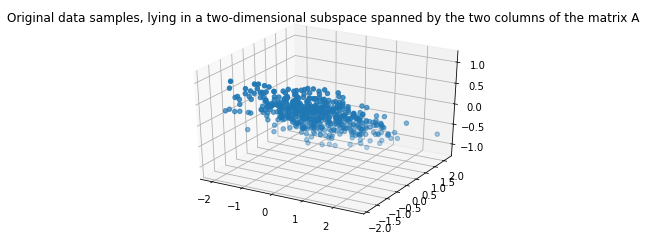

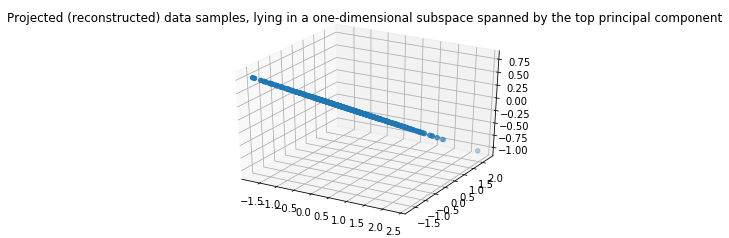

In [9]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Scatter plot for the original data samples
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.T[:,0],X.T[:,1],X.T[:,2])
plt.title('Original data samples, lying in a two-dimensional subspace spanned by the two columns of the matrix A')
plt.show()

# Scatter plot for the reconstructed data samples using only the top principal component
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_hat_2.T[:,0],X_hat_2.T[:,1],X_hat_2.T[:,2])
plt.title('Projected (reconstructed) data samples, lying in a one-dimensional subspace spanned by the top principal component')
plt.show()

### Generation of Dataset \#2

In [10]:
# Problem 1

# Generation of the (random) mean vector
c = np.sqrt(3)*np.random.randn(3,1)

# Problem 2

# Generation of random coefficients for the dataset
V = np.random.randn(2,N)

# Generation of the dataset
c_mat = np.tile(c,[1,N])
X = A@V + c_mat

# Print the rank of X
display(Latex(r'The rank of matrix $\mathbf X$ is: rank($\mathbf X$) = {}.'.format(np.linalg.matrix_rank(X))))

<IPython.core.display.Latex object>

### PCA, Centering, and Dataset \#2

In [11]:
# Problem 1

# Singular value decomposition of X without centering the data first
U, s, Vh = np.linalg.svd(X)

# Approximation of the original three-dimensional data matrix X using the top two principal components
X_hat = U[:,0:2]@U[:,0:2].T@X

# Compute the PCA representation error and display it
display(Latex(r'The PCA representation error, defined as $\|\widehat{{\mathbf{{X}}}} - \mathbf{{X}}\|_F^2$, using the top two principal components of non-centered data is given by {}.'
             .format(np.linalg.norm(X_hat-X)**2)))

<IPython.core.display.Latex object>

Indeed, the PCA error is nowhere close to being zero. We now investigate whether this is due to the rank of $\mathbf{X}$ being three or whether this is due to non-centering of the data set.

In [12]:
# Computation of the empirical mean of data, both as a vector and as a tiled matrix
mean_vec = (np.sum(X, axis=1))/N
mean_mat = np.tile(mean_vec.reshape(3,1),[1,N])

# Centered data matrix
centered_X = X - mean_mat

# Singular value decomposition of centered data
U, s, Vh = np.linalg.svd(centered_X)

# Approximation of the original three-dimensional data matrix X using the top two principal components
X_hat = (U[:,0:2]@U[:,0:2].T@centered_X) + mean_mat

# Compute the PCA representation error and display it
display(Latex(r'The PCA representation error, defined as $\|\widehat{{\mathbf{{X}}}} - \mathbf{{X}}\|_F^2$, using the top two principal components of centered data is given by {}.'
             .format(np.linalg.norm(X_hat-X)**2)))

<IPython.core.display.Latex object>

Thus, we confirm that, for nonzero mean data, centering is the key to exploit the benefits of PCA.

### Generation of Dataset \#3

In [13]:
# Problem 1

# Generation of random coefficients for the dataset
V = np.random.randn(2,N)

# Generation of noisy dataset
X = A@V + np.sqrt(0.01)*np.random.randn(3,N)

# Normalization of the dataset (normalization of each column)
for idx in range(N):
    X[:,idx:idx+1] = X[:,idx:idx+1]/np.linalg.norm(X[:,idx:idx+1])
    
# Rename the normalized data matrix as X_check
X_check = X

# Print the rank of X_check
display(Latex(r'The rank of matrix $\check{{\mathbf X}}$ is: rank($\check{{\mathbf X}}$) = {}.'.format(np.linalg.matrix_rank(X_check))))

# Singular value decomposition of data
U, s, Vh = np.linalg.svd(X_check)

# Print the singular values of X_check
display(Latex(r'The singular values of $\check{{\mathbf{{X}}}}$ are: {}.'.format(s)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### PCA Denoising of Dataset \#3

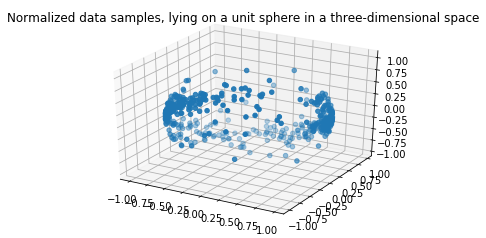

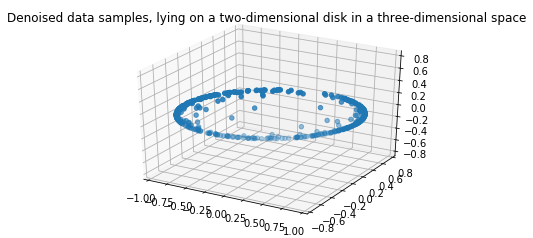

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [14]:
# Problem 1

# Scatter plot for the normalized data samples
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_check.T[:,0],X_check.T[:,1],X_check.T[:,2])
plt.title('Normalized data samples, lying on a unit sphere in a three-dimensional space')
plt.show()

# Problem 2

# Denoised data matrix, obtained by projecting and reconstructing X_check using the top two principal components of X_check
X_hat = U[:,0:2]@U[:,0:2].T@X_check

# Problem 3

# Scatter plot for the denoised data samples
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_hat.T[:,0],X_hat.T[:,1],X_hat.T[:,2])
plt.title('Denoised data samples, lying on a two-dimensional disk in a three-dimensional space')
plt.show()

# Problem 4

# Compute the PCA representation error and display it
display(Latex(r'The PCA representation error, defined as $\|\widehat{{\mathbf{{X}}}} - \check{{\mathbf{{X}}}}\|_F^2$, using the top two principal components of normalized data is given by {}.'
             .format(np.linalg.norm(X_hat-X_check)**2)))

# Compute the square of the third-largest singular value of X_check and display it
display(Latex(r'The square of the third-largest singular value of $\check{{\mathbf{{X}}}}$ is {}.'.format(s[2]**2)))

This, once again, confirms the relationship between the PCA error and the singular values of the data matrix.

## PCA Involving Real Data

A representative image of digit 0 from the dataset


<Figure size 432x288 with 0 Axes>

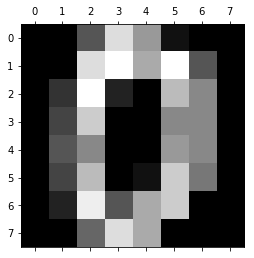

In [15]:
from sklearn.datasets import load_digits

# Load data (handwritten images of digit 0)
images, labels = load_digits(1, return_X_y=True)

# Problem 1

# Show an image of digit 0 from the dataset
print('A representative image of digit 0 from the dataset')
plt.gray() 
plt.matshow(images[0,:].reshape((8,8)))
plt.show()

Mean 'image' of digit 0, as calculated from the dataset


<Figure size 432x288 with 0 Axes>

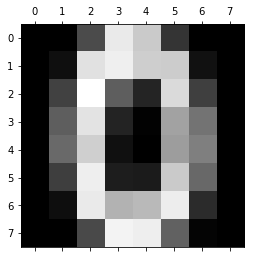

In [16]:
# Problem 2

# Arranging the dataset so that each data sample is a column in the data matrix
X = images.T

# Computation of the empirical mean of data, both as a vector and as a tiled matrix
mean_vec = (np.sum(X, axis=1))/(X.shape[1])
mean_mat = np.tile(mean_vec.reshape(X.shape[0],1),[1,X.shape[1]])

# Centered data matrix
centered_X = X - mean_mat

# Plotting of the empirical mean
print('Mean \'image\' of digit 0, as calculated from the dataset')
plt.gray() 
plt.matshow(np.reshape(mean_vec, (8,8)))
plt.show()

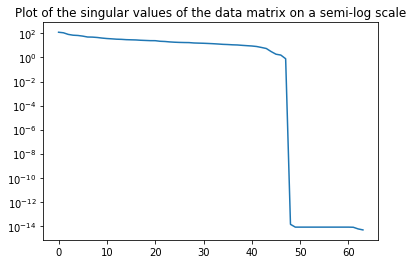

<IPython.core.display.Latex object>

In [17]:
# Problem 3

# Singular value decomposition of centered data
U, s, Vh = np.linalg.svd(centered_X)

# Plot of the singular values
plt.semilogy(s)
plt.title('Plot of the singular values of the data matrix on a semi-log scale')
plt.show()

# Computation of an appropriate 'k'
k = 0; cum_sum = 0
data_energy = np.linalg.norm(centered_X)**2
for i in range(len(s)):
    cum_sum = cum_sum + s[i]**2
    if cum_sum/data_energy >= 0.9:
        k = i+1
        break

# Print the value of k
display(Latex(r'The calculated value of the integer $k$ is {}.'.format(k)))

The top principal component of digit 0 in the form of a grayscale image


<Figure size 432x288 with 0 Axes>

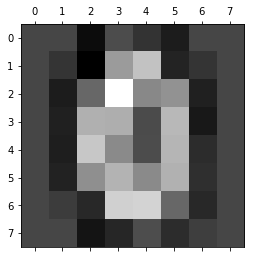

In [18]:
# Problem 4

# Matrix of the top-k principal components of the centered data matrix
U_k = U[:,0:k]

# Plotting of the top principal component
print('The top principal component of digit 0 in the form of a grayscale image')
plt.gray() 
plt.matshow(np.reshape(U_k[:,0], (8,8)))
plt.show()

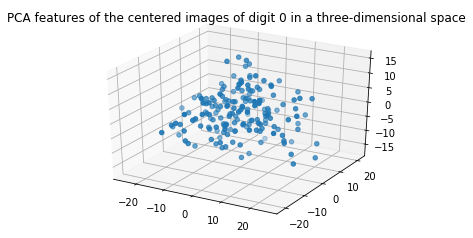

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [19]:
# Problem 5

# Matrix of the top three principal components of the centered data matrix
U_3 = U[:,0:3]

# Compute the PCA-based features of the centered data using the topthree principal components
X_tilde = U_3.T@centered_X

# Scatter plot for the three-dimensional PCA features of the centered images
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tilde.T[:,0],X_tilde.T[:,1],X_tilde.T[:,2])
plt.title('PCA features of the centered images of digit 0 in a three-dimensional space')
plt.show()

# Reconstruction (approximation) of the original images using the top three principal components
X_hat = U_3@X_tilde + mean_mat

# Compute the PCA representation error and display it
display(Latex(r'The PCA representation error, defined as $\|\widehat{{\mathbf{{X}}}} - \mathbf{{X}}\|_F^2$, using the top three principal components of normalized data is given by {}.'
             .format(round(np.linalg.norm(X_hat-X)**2,5))))

# Compute the sum of squares of all but the top three singular values of centered_X and display it
display(Latex(r'The sum of squares of all but the top three singular values of $\bar{{\mathbf{{X}}}}$ is {}.'.format(round(np.linalg.norm(s[3:])**2,5))))

It can be seen from the last two calculations that the PCA error is once again given by the residual energy in the singular values that are not part of the PCA calculations. In this particular problem, these singular values correspond to all but the first three singular values of $\bar{\mathbf{X}}$.

Reconstruction of a representative image of digit 0 from the dataset


<Figure size 432x288 with 0 Axes>

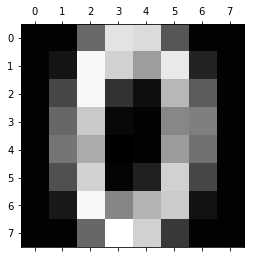

In [20]:
# Image of the reconstructed image of digit 0 (a representative example)
print('Reconstruction of a representative image of digit 0 from the dataset')
plt.gray() 
plt.matshow(X_hat[:,0].reshape((8,8)))
plt.show()